In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

# Hőterjedés vizsgálata 1 dimenzióban

A mérés a képen látható kísérletben történik.
<img src="supplementary/hőterjedés.png" alt="mérési összeállítás">

A mérés célja a hődiffúziós egyenlet kísérleti vizsgálata. A mérési elrendezésben egy réz rúdat használunk, amelynek végeit fűteni, illetve az egyik végét hűteni is tudjuk. Cél megvizsgálni milyen gyorsan reagál a rúd a változásokra, megállapítani a hődiffúziós állandót, és azt összevetni az anyagra ismert irodalmi értékkel.

A hődiffúziós egyenlet az időben változó skalármezőre, a hőmérsékletre, $T(\mathbf{r}, t)$-re, ró ki összefüggést:
$$ \frac{\partial T}{\partial t} = D \Delta T,$$
ahol $\Delta$ a Laplace-operátor, esetünkben $\frac{\partial^2}{\partial x^2}.$

A vizsgált rendszer térben és időben diszkrét, nagyjából másodpercenként méri a rúd mentén nyolc pontban a hőmérsék pillanatnyi értékét.

# 1. Alapvonal

A rendszer nincs termikusan izolálva. 

Először győződjünk meg arról, hogy a rúd végeire kötött hőtartályok kikapcsolása mellett (nyílt peremfeltétel) mit mérünk.
Ez tekinthető egyfajta kalibrációnak atekintetben, hogy meg tudjuk vizsgálni az egyes hőmérők a szobahőmérsékletet miként mérik, milyen ingadozások jellemzőek.

Ezen a ponton még **NE** kösse az elektromos hálózatba a mérést!

A vezérléshez és adatgyűjtéshez tartozó tudnivalókat a `README-hőterjedés.ipynb` foglalja össze.

Ha bizonytalan a műveletekkel vagy hibát tapasztal, kérje a laborvezető segítségét.

## 1. 1. Szobahőmérséklet mérése - 4 pont

Hosszabb időre (10 perc) mérje a hátteret. Mentse le a mérési adatokat a `terem.dat` fájlba. Menet közben készítsen ábrát a hőmérséklet időfejlődéséről! Elemezze a tapasztaltakat. 

In [3]:
file_path = "terem.dat"

try:
    with open(file_path, "r") as file:
     
        data = file.read()

        
        lines = data.split("\n")
        
       
    
    
    
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [4]:
split_data = [line.split() for line in lines[20:]]

In [5]:
new_data=[]
for list in split_data:
    for item in list:
        item = float(item)
        new_data.append(item)
new_data = array(new_data)

In [6]:
new_data

array([3.30000e+01, 2.47500e+01, 2.46875e+01, ..., 6.55350e+04,
       0.00000e+00, 1.00000e+00])

In [7]:
elso = new_data[1::12]
masodik = new_data[2::12]
harmadik = new_data[3::12]
negyedik = new_data[4::12]
otodik = new_data[5::12]
hatodik = new_data[6::12]
hetedik = new_data[7::12]
nyolcadik = new_data[8::12]

In [8]:
datas = [elso,masodik,harmadik,negyedik,otodik,hatodik,hetedik,nyolcadik]

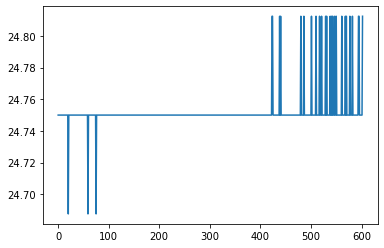

In [9]:
plot(elso)

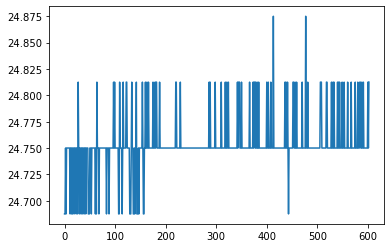

In [10]:
plot(masodik)

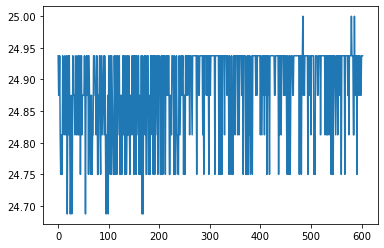

In [11]:
plot(harmadik)

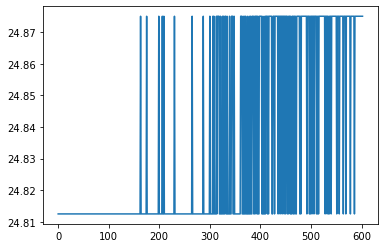

In [12]:
plot(negyedik)

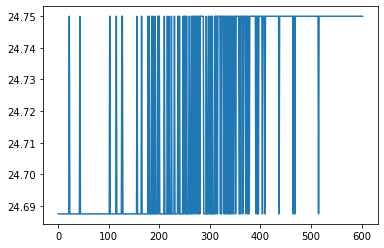

In [13]:
plot(otodik)

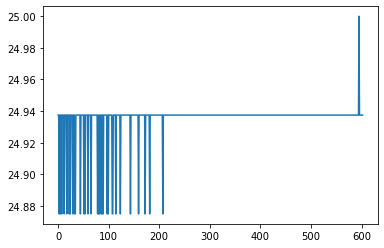

In [14]:
plot(hatodik)

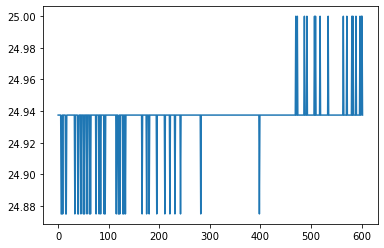

In [15]:
plot(hetedik)

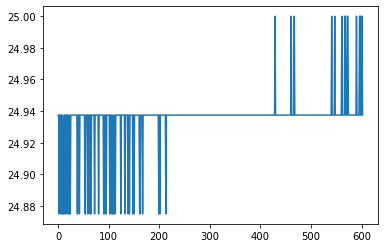

In [16]:
plot(nyolcadik)

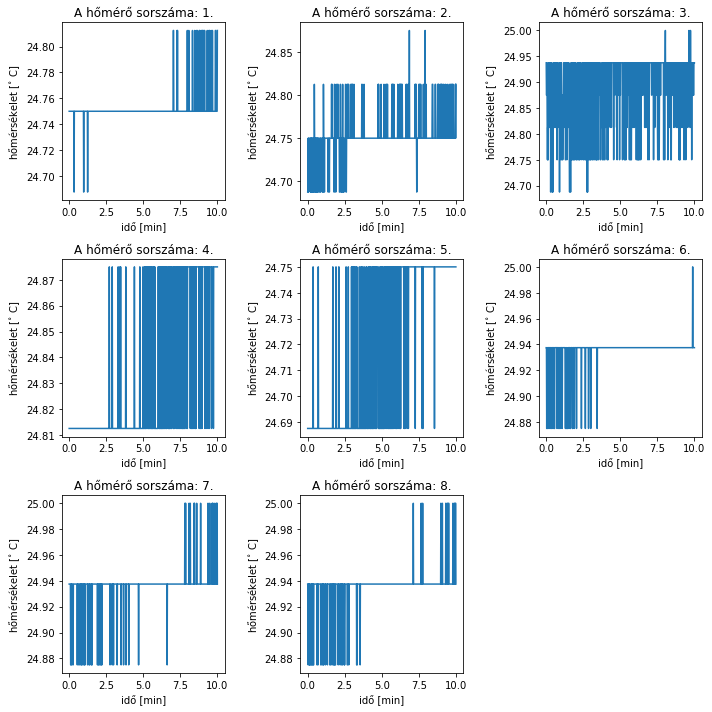

In [17]:
t = linspace(0,10,len(elso))
figsize(10,10)
for i in range(8):
    subplot(3,3,i+1)
    plot(t,datas[i])
    tight_layout()
    title(f"A hőmérő sorszáma: {i+1}.")
    xlabel("idő [min]")
    ylabel(r"hőmérsékelet [$^{\circ}$ C]")
    
savefig("alap.png")

# 2. Hőterjedés a rúdban

## 2. 1. Hűtés bekapcsolása - 6 pont

A hőmérő adatait írja a `hut.dat` fájlba. Az adatok gyűjtésének kezdete után kapcsolja be a rúd egyik végének hűtését.

A menet közben keletkező `terem.dat` fájl alapján nézze meg, mikor alakul ki állandósult állapot. 

Illesszen a mérési adatokra alkalmasan választott függvényt és állapítsa meg, milyen időálladó jellemzi a rendszert! 

In [19]:
file_path = "hut3.dat"

try:
    with open(file_path, "r") as file:
       
        data = file.read()


        lines = data.split("\n")
        
   
      
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [20]:
split_data2 = [line.split() for line in lines[22:]]

In [21]:
new_data2=[]
for list in split_data2:
    for item in list:
        item = float(item)
        new_data2.append(item)
new_data2 = array(new_data2)

In [22]:
elsohut = new_data2[1::12]
masodikhut = new_data2[2::12]
harmadikhut = new_data2[3::12]
negyedikhut = new_data2[4::12]
otodikhut = new_data2[5::12]
hatodikhut = new_data2[6::12]
hetedikhut = new_data2[7::12]
nyolcadikhut = new_data2[8::12]

In [23]:
def expmodel(t,a,b,T):
    return a*exp(-t/T) + b 

In [24]:
datas = array([elsohut,masodikhut,harmadikhut,negyedikhut,otodikhut,hatodikhut,hetedikhut,nyolcadikhut])
a = []
b = []
T = []

ts = []
aerrs = []
berrs =[]
Terrs = []
for item in datas:
    t =  array(range(0,len(item)))
    ts.append(t)
    popt,pcov = curve_fit(expmodel,t[140:],item[140:], p0 = [1,5,200])
    perr = sqrt(diag(pcov))
    a.append(popt[0])
    aerrs.append(perr[0])
    b.append(popt[1])
    berrs.append(perr[1])
    T.append(popt[2])
    Terrs.append(perr[2])
    

In [25]:
array(T).mean()
std(array(T))

98.10447381549736

In [26]:
std(array(T))

98.10447381549736

In [27]:
98.10/315.45*100

31.098430813124107

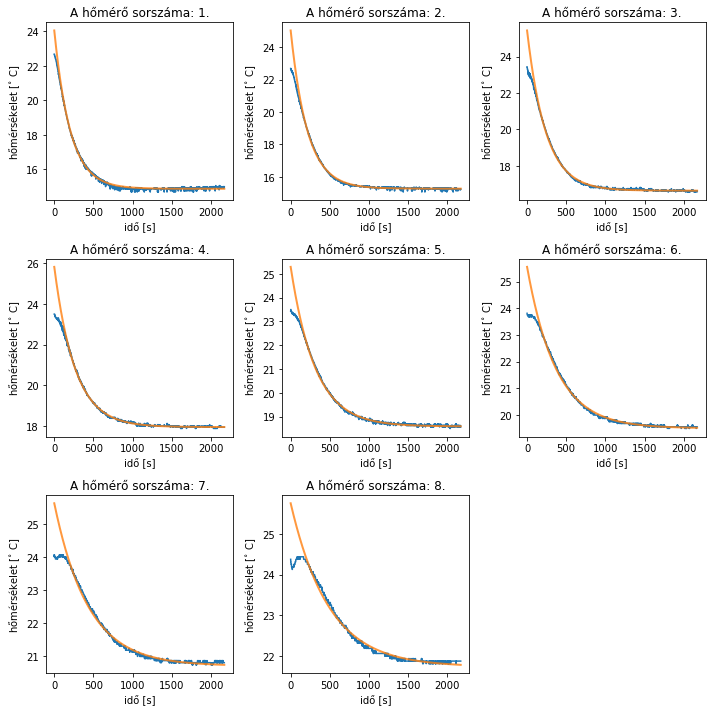

In [28]:
figsize(10,10)
for i in range(8):
    subplot(3,3,i+1)
    plot(ts[i],datas[i])
    plot(ts[i],expmodel(ts[i],a[i],b[i],T[i]),alpha = 0.8, lw = 2)
    title(f"A hőmérő sorszáma: {i+1}.")
    xlabel("idő [s]")
    ylabel(r"hőmérsékelet [$^{\circ}$ C]")
    tight_layout()
savefig("hut.png")    

## 2. 2. Fűtés bekapcsolása - 6 pont

Az előző mérésmenet mintájára gyűjtsük az adatokat a `fut.dat` fájlba. És adjuk ki a fűtési parancsot a rúd másik végére.

Újra addig mérjen, amíg nem alakul ki állandósult állapot. Újra illesszen az idősorokra. Most milyen időálladókat kap az illesztésből?

In [29]:
def expmodel(t,a,b,T):
    return -a*exp(-t/T) + b  

In [30]:
file_path = "fut.dat"

try:
    with open(file_path, "r") as file:

        data = file.read()

 
        lines = data.split("\n")
       
    
    
    
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [31]:
split_data3 = [line.split() for line in lines[22:]]

In [32]:
new_data3=[]
for list in split_data3:
    for item in list:
        item = float(item)
        new_data3.append(item)
new_data3 = array(new_data3)

In [33]:
elsofut = new_data3[1::12]
masodikfut = new_data3[2::12]
harmadikfut = new_data3[3::12]
negyedikfut = new_data3[4::12]
otodikfut = new_data3[5::12]
hatodikfut = new_data3[6::12]
hetedikfut = new_data3[7::12]
nyolcadikfut = new_data3[8::12]

In [34]:
datas = array([elsofut,masodikfut,harmadikfut,negyedikfut,otodikfut,hatodikfut,hetedikfut,nyolcadikfut])
a = []
b = []
T = []
ts = []
aerrs = []
berrs =[]
Terrs = []
for item in datas:
    t =  array(range(0,len(item)))
    ts.append(t)
    popt,pcov = curve_fit(expmodel,t[250:],item[250:], p0 = [1,item[-1],200])
    perr = sqrt(diag(pcov))
    a.append(popt[0])
    aerrs.append(perr[0])
    b.append(popt[1])
    berrs.append(perr[1])
    T.append(popt[2])
    Terrs.append(perr[2])

In [35]:
for item in Terrs:
    print(round(item,2))

1.22
0.95
0.56
0.49
0.3
0.28
0.28
0.31


In [36]:
array(T).mean()


402.3214875750389

In [37]:
std(array(T))

30.851190835592476

In [38]:
30.85/402.32 *100

7.668025452376219

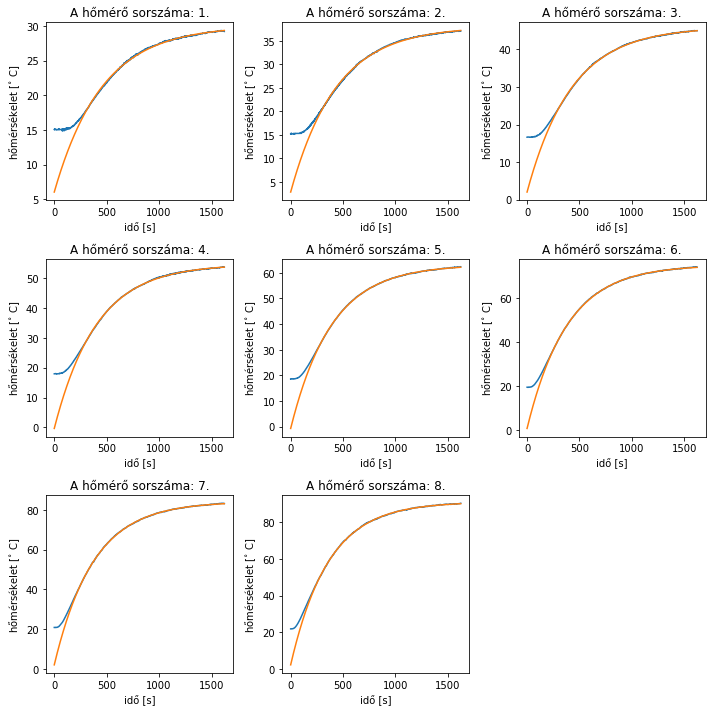

In [39]:
figsize(10,10)
for i in range(8):
    subplot(3,3,i+1)
    plot(ts[i],datas[i])
    plot(ts[i],expmodel(ts[i],a[i],b[i],T[i]))
    title(f"A hőmérő sorszáma: {i+1}.")
    xlabel("idő [s]")
    ylabel(r"hőmérsékelet [$^{\circ}$ C]")
    tight_layout()
savefig("futes.png")   

## 2. 3. Profil az álladósult állapotban - 4 pont

A mérés végén milyen alakú a hőmérséklet távolságfüggése?

Írja le:
* mit vár,
* mit tapasztal, és 
* értekezzen az esetleges eltérések okáról.

In [40]:
x=[16.4, 14.2, 15.5, 14.6, 13.9, 17.2, 16.2, 15.8]
tok = 4 #to92-es tokozásúak - kb 4mm
for i in range(1,len(x)):
    x[i] += tok + x[i-1]
x=array(x)
print(x)

[ 16.4  34.6  54.1  72.7  90.6 111.8 132.  151.8]


In [41]:
y=[nyolcadikfut[-1],hetedikfut[-1],hatodikfut[-1],otodikfut[-1], negyedikfut[-1],harmadikfut[-1], masodikfut[-1],elsofut[-1]]

In [42]:
y = sorted(y)

In [43]:
def line(t,a,b):
    return a*t+b

In [44]:
popt,pcov = curve_fit(line,x,y)
perr = sqrt(diag(pcov))

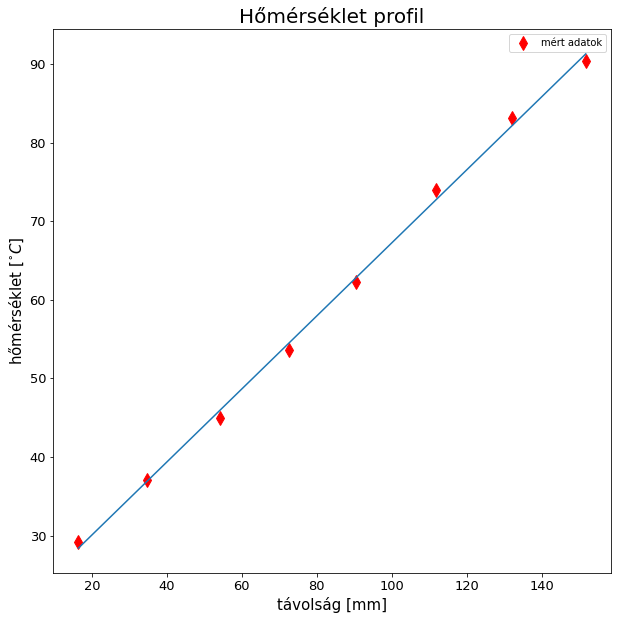

In [45]:
plot(x,y, ls = " ", marker = "d", color = "r",ms = 10, label = "mért adatok")
plot(x,line(x,*popt))
title("Hőmérséklet profil", size = 20)
xticks(size=13)
yticks(size=13)
legend()
xlabel("távolság [mm]", size = 15)
ylabel(r"hőmérséklet [$^{\circ} C$]", size = 15)
savefig("profil.png")

## 2. 4. A hődiffúziós állandó - 4 pont

A `fut.dat` adataira támaszkodva becsülje meg a $D$ hődiffúziós állandót!

## 2. 5. Légkeverés hatása - 2 pont

Mentse a mérési adatokat a `kever.dat` fájlba és kapcsolja be a ventillátort. Mérjen addig, amíg időben le nem csengenek a változások. Újra vizsgálja meg a hőmérséklet helyfüggését! Mit tapasztal, indokoljon!

In [46]:
file_path = "fut__.dat"

try:
    with open(file_path, "r") as file:
   
        data = file.read()

   
        lines = data.split("\n")
        
     
    
    
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [47]:
split_data4 = [line.split() for line in lines[22:]]
new_data4=[]
for list in split_data4:
    for item in list:
        item = float(item)
        new_data4.append(item)
new_data4 = array(new_data4)

In [48]:
elsovent = new_data4[1::12]
masodikvent = new_data4[2::12]
harmadikvent = new_data4[3::12]
negyedikvent = new_data4[4::12]
otodikvent = new_data4[5::12]
hatodikvent = new_data4[6::12]
hetedikvent = new_data4[7::12]
nyolcadivent = new_data4[8::12]

In [49]:
datas = array([elsovent,masodikvent,harmadikvent,negyedikvent,otodikvent,hatodikvent,hetedikvent,nyolcadivent])

In [50]:
ts = []
for item in datas:
    t =  array(range(0,len(item)))
    ts.append(t)

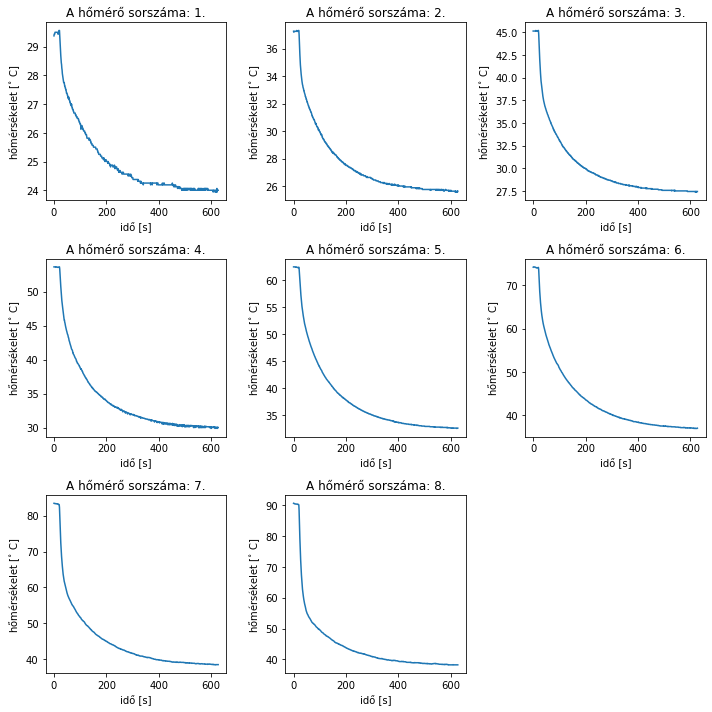

In [51]:
figsize(10,10)
for i in range(8):
    subplot(3,3,i+1)
    plot(ts[i][:-10],datas[i][:-10]) #vélelenül rá lett kapcsolva fűtés újra ezért végső pár adatok levágtam
    title(f"A hőmérő sorszáma: {i+1}.")
    xlabel("idő [s]")
    ylabel(r"hőmérsékelet [$^{\circ}$ C]")
    tight_layout()
savefig("vent.png")

In [52]:
y=[elsovent[-1],masodikvent[-1],harmadikvent[-1],negyedikvent[-1],otodikvent[-1],hatodikvent[-1],hetedikvent[-1],nyolcadivent[-1]]

In [53]:
popt,pcov = curve_fit(line,x,y)
perr = sqrt(diag(pcov))

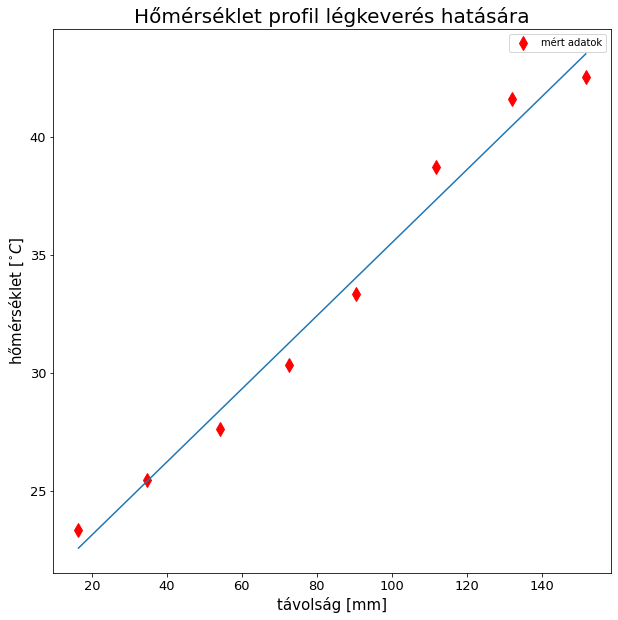

In [54]:
plot(x,y, ls = " ", marker = "d", color = "r",ms = 10, label = "mért adatok")
plot(x,line(x,*popt))
title("Hőmérséklet profil légkeverés hatására", size = 20)
xticks(size=13)
yticks(size=13)
legend()
xlabel("távolság [mm]", size = 15)
ylabel(r"hőmérséklet [$^{\circ} C$]", size = 15)
savefig("profil2.png")

# 3. Hőhullám - 5 pont

A korábbi mérésekben kitapasztalt időállandó(k) figyelembe vételével kapcsolgassa a fűtést ki-be. Mentse az adatokat a `hullam.dat` fájlba. Ábrázolja a kialakuló hullámformákat. Becsülje meg a hullámfrontok (csúcsok) terjedési sebességét. 

## 3. 1. A impulzusválasza - 3 pont

Mi lehet a rendszer súlyfüggvéne?

# 4. Modellezés - 6 pont

Szimulálja a rendszert térben (is) finomabb rácson. Mennyire illeszkedik a szimulált adatsor a mérésekhez?